In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
revenue_data = pd.read_csv("/kaggle/input/revenue-prediction/revenue_prediction.csv")
revenue_data.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [4]:
revenue_data.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

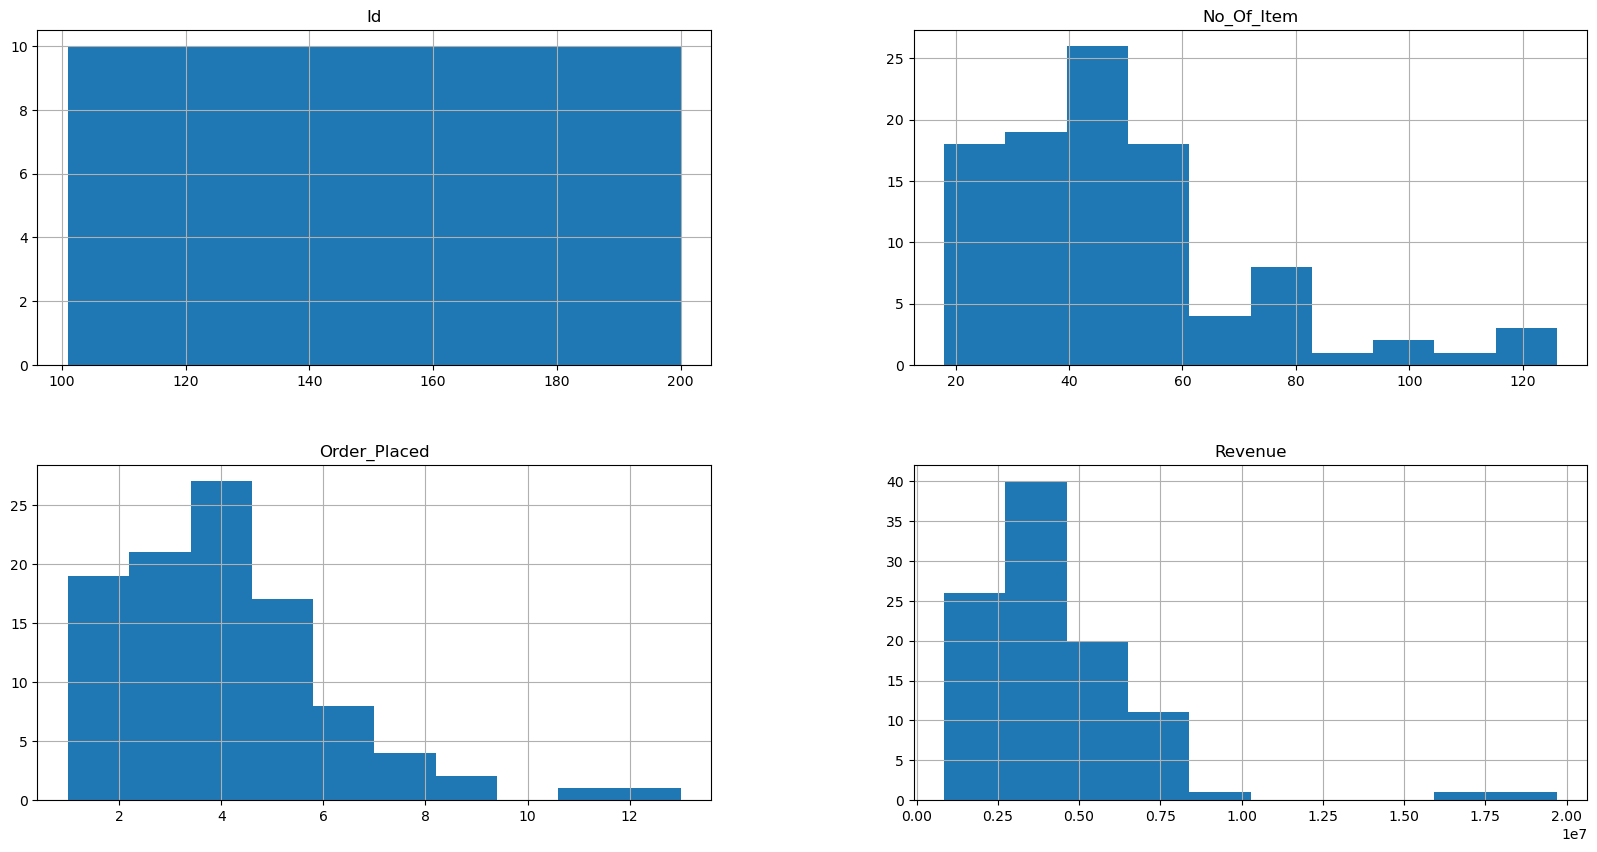

In [5]:
revenue_data.hist(figsize = (20,10))
plt.show()

In [6]:
revenue_data.describe()

,Id,No_Of_Item,Order_Placed,Revenue
count,100.000000,100.000000,100.000000,1.000000e+02
mean,150.500000,49.080000,4.086000,4.395161e+06
std,29.011492,22.370923,2.055101,2.659932e+06
min,101.000000,18.000000,1.000000,8.498700e+05
25%,125.750000,34.750000,2.750000,2.688328e+06
50%,150.500000,45.000000,3.650000,3.911401e+06
75%,175.250000,57.250000,5.100000,5.330084e+06
max,200.000000,126.000000,13.000000,1.969694e+07


In [7]:
revenue_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [8]:
x = revenue_data[['No_Of_Item','Order_Placed']]
y = revenue_data[['Revenue']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [10]:
from sklearn.metrics import r2_score

In [11]:
r2_score(y_test,y_pred)

0.8971415049256724

In [12]:
comparision = pd.DataFrame(columns = ['Actual','Predictions'])

In [13]:
comparision['Actual'] = y_test

In [14]:
comparision['Predictions'] = y_pred

In [15]:
comparision.head()

,Actual,Predictions
34,4100886,4.322856e+06
51,3273041,3.219751e+06
64,2551252,2.319136e+06
11,3861370,5.623156e+06
63,1619683,1.192043e+06


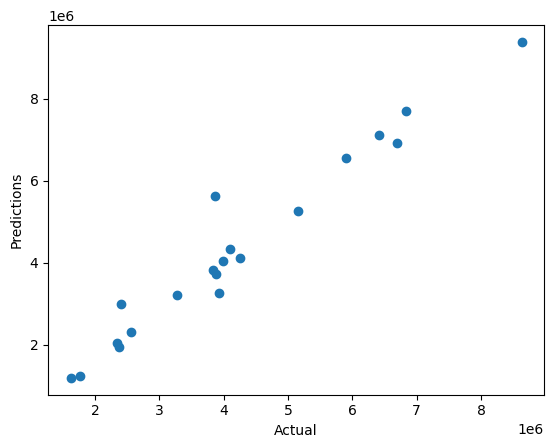

In [16]:
plt.scatter(comparision['Actual'],comparision['Predictions'])
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

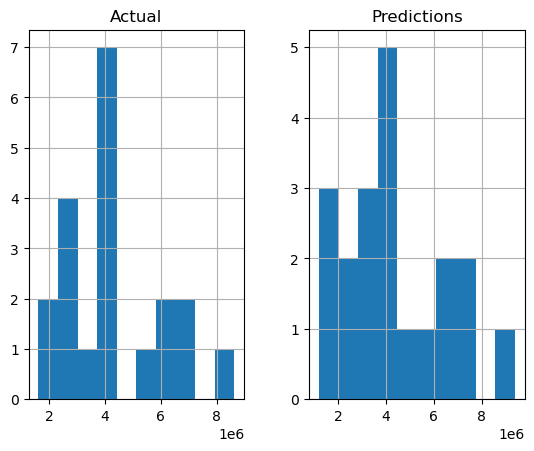

In [17]:
comparision.hist()
plt.show()